# Project Group 35

Members: Mathijs Kop, Roos Wentges, Irene Bosman, Sathvik Gadiraju, Sophie Pijnenburg

Student numbers: 5095433, 4869419 , 4882237, 6084435 , 4851404

# Research Objective

*Requires data modeling and quantitative research in Transport, Infrastructure & Logistics*

In the recent years, fuel cost have undergone substatantial increases due to geopolitical devlopements and policy changes. The rising fuel prices becoming a prevalent concern for individuals and this could impact the human mobility behaviour. This study investigates the relationship between the increasing fual prices and the choices people make in terms of there travel behaviour, especially fuel based travelling.

Therefore, the research question in this data analysis is: 

*What relation can be found between rising fuel costs and mobility behaviour from 2018 to 2022?*

Subquestions:
1.  How have fuel prices developed in the considered time in the Netherlands?
2.  To what extend does the location of the gas stations determine fuel price trends?
3.  How did the general mobility behaviour for all modes compared to fuel based modes change in the Netherlands?
4.  How have the mobility motives developed in the considered time in the Netherlands?

Geographical boundary: The Netherlands

Time scale:  2018-2022

# Contribution Statement

*Be specific. Some of the tasks can be coding (expect everyone to do this), background research, conceptualisation, visualisation, data analysis, data modelling*

**Author 1**:

**Author 2**:

**Author 3**:

# Data Used

CBS: https://opendata.cbs.nl/#/CBS/en/dataset/84710ENG/table?ts=1696337832049, \
https://opendata.cbs.nl/#/CBS/en/dataset/80416ENG/table?ts=1696337975859, \
https://opendata.cbs.nl/statline/#/CBS/en/dataset/84755ENG/table?ts=1696338796089, \
https://opendata.cbs.nl/statline/#/CBS/en/dataset/81567eng/table?ts=1698660850868. 

# Data Pipeline

From the first link we will look into distance traveled in passenger kilometres for different travel motives. 
From the second link we will look into the mean fuel prices per year, to compare with the distance traveled. The third link can be used to find the general mobility trend for the different travel motives over the years. And the last link is of the local and highway fuel prices.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
from pandas import read_csv

### data preperation subquestion 1

In [2]:
# Read and clean data
fuel_prices = read_csv('fuelprices.csv', skiprows = 5, delimiter = ';', index_col = 0, parse_dates=True, infer_datetime_format=True).dropna().rename({'euro/liter':'Euro95','euro/liter.1':'Diesel', 'euro/liter.2':'LPG' }, axis=1)
fuel_prices.index.names = ['Months']
fuel_prices.index = pd.to_datetime(fuel_prices.index)

# Add average of fuel prices to data
fuel_prices['Average'] = fuel_prices.mean(axis=1)
display(fuel_prices.head())

# Melt data for plotly
melted_fuel_prices = pd.melt(fuel_prices.reset_index(), id_vars=['Months'], value_vars=['Euro95', 'Diesel', 'LPG', 'Average'], var_name='Fuel Type', value_name='Price')
display(melted_fuel_prices.head())

C:\Users\sophi\AppData\Local\Temp\ipykernel_7908\4226807594.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  fuel_prices = read_csv('fuelprices.csv', skiprows = 5, delimiter = ';', index_col = 0, parse_dates=True, infer_datetime_format=True).dropna().rename({'euro/liter':'Euro95','euro/liter.1':'Diesel', 'euro/liter.2':'LPG' }, axis=1)


,Euro95,Diesel,LPG,Average
Months,,,,
2018-01-01,1.589,1.292,0.696,1.192333
2018-02-01,1.566,1.254,0.667,1.162333
2018-03-01,1.545,1.260,0.654,1.153000
2018-04-01,1.608,1.301,0.663,1.190667
2018-05-01,1.668,1.360,0.675,1.234333


,Months,Fuel Type,Price
0,2018-01-01,Euro95,1.589
1,2018-02-01,Euro95,1.566
2,2018-03-01,Euro95,1.545
3,2018-04-01,Euro95,1.608
4,2018-05-01,Euro95,1.668


### data preperation subquestion 2


In [23]:
# Read, clean and prep data highway
data_highway = read_csv('highway.csv', skiprows = 5, delimiter = ';', index_col = 0, parse_dates=True, infer_datetime_format=True)
highway = data_highway.dropna().rename({'euro/litre':'highway Euro95','euro/litre.1':'highway Diesel', 'euro/litre.2':'highway LPG' }, axis=1)
highway.index.names = ['Months']
highway.index = pd.to_datetime(data_highway.index)
display(highway.head())

# Read, clean and prep data local
data_local = read_csv('local.csv', skiprows = 5, delimiter = ';', index_col = 0, parse_dates=True, infer_datetime_format=True)
local = data_local.dropna().rename({'euro/litre':'local Euro95','euro/litre.1':'local Diesel', 'euro/litre.2':'local LPG' }, axis=1)
local.index.names = ['Months']
local.index = pd.to_datetime(data_local.index)
display(local.head())

# Read, clean and prep data local
data_unmanned = read_csv('unmanned.csv', skiprows = 5, delimiter = ';', index_col = 0, parse_dates=True, infer_datetime_format=True)
unmanned = data_unmanned.dropna().rename({'euro/litre':'unmanned local Euro95','euro/litre.1':'unmanned local Diesel'}, axis=1)

unmanned.index = pd.to_datetime(unmanned.index)
display(unmanned.head())

# Read, clean and prep data average
data_avg = read_csv('avg.csv', skiprows = 5, delimiter = ';', index_col = 0, parse_dates=True, infer_datetime_format=True)
avg = data_avg.dropna().rename({'euro/litre':'avg Euro95','euro/litre.1':'avg Diesel', 'euro/litre.2':'avg LPG' }, axis=1)
avg.index.names = ['Months']
avg.index = pd.to_datetime(data_avg.index)
display(avg.head())

# Put in dataframe per fuel type for plotly
euro95 = pd.DataFrame({'highway': highway['highway Euro95'], 'local': local['local Euro95'],'avg': avg['avg Euro95'], 'unmanned local': unmanned['unmanned local Euro95']})
diesel = pd.DataFrame({'highway': highway['highway Diesel'], 'local': local['local Diesel'],'avg': avg['avg Diesel'], 'unmanned local': unmanned['unmanned local Diesel']})
LPG = pd.DataFrame({'highway': highway['highway LPG'], 'local': local['local LPG'],'avg': avg['avg LPG']})

C:\Users\roosw\AppData\Local\Temp\ipykernel_5872\2146287560.py:2: FutureWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



,highway Euro95,highway Diesel,highway LPG
Periods,,,
2018-01-01,1.681,1.376,0.748
2018-02-01,1.657,1.336,0.717
2018-03-01,1.637,1.344,0.708
2018-04-01,1.701,1.385,0.717
2018-05-01,1.761,1.445,0.730


C:\Users\roosw\AppData\Local\Temp\ipykernel_5872\2146287560.py:9: FutureWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



,local Euro95,local Diesel,local LPG
Periods,,,
2018-01-01,1.588,1.294,0.676
2018-02-01,1.565,1.256,0.647
2018-03-01,1.544,1.261,0.633
2018-04-01,1.606,1.303,0.642
2018-05-01,1.666,1.362,0.654


C:\Users\roosw\AppData\Local\Temp\ipykernel_5872\2146287560.py:16: FutureWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



,unmanned local Euro95,unmanned local Diesel
Periods,,
2018-01-01,1.551,1.257
2018-02-01,1.528,1.219
2018-03-01,1.506,1.225
2018-04-01,1.570,1.266
2018-05-01,1.629,1.324


C:\Users\roosw\AppData\Local\Temp\ipykernel_5872\2146287560.py:23: FutureWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



,avg Euro95,avg Diesel,avg LPG
Periods,,,
2018-01-01,1.589,1.292,0.696
2018-02-01,1.566,1.254,0.667
2018-03-01,1.545,1.260,0.654
2018-04-01,1.608,1.301,0.663
2018-05-01,1.668,1.360,0.675


### data preperation subquestion 3


In [5]:
# Read and clean data
mobility_trips = read_csv('mobility_perday.csv', index_col = 1, skiprows = 6, delimiter = ';', usecols = [0,1,2,3,4,5,6])
mobility_trips.index.name = 'modes'
mobility_trips = mobility_trips.dropna().drop('Travel modes')
mobility_trips = mobility_trips.rename({'Unnamed: 0':'motive'}, axis=1)
display(mobility_trips.head())

# Select data total for motives and reshape for plotly 
years = ['2018', '2019', '2020', '2021', '2022']
mobility_trend = mobility_trips[mobility_trips['motive'] == 'Total']
mobility_trend_years = mobility_trend[years].reset_index()
melted_mobility_trend = mobility_trend_years.melt(id_vars='modes', var_name='year', value_name='trips')
melted_mobility_trend['trips'] = melted_mobility_trend['trips'].astype(float)
display(melted_mobility_trend.head())

,motive,2018,2019,2020,2021,2022
modes,,,,,,
Total,Total,2.78,2.71,2.35,2.51,2.70
Passenger car (driver),Total,0.96,0.95,0.81,0.82,0.87
Train,Total,0.08,0.08,0.03,0.03,0.05
Bike,Total,0.79,0.76,0.63,0.64,0.75
Walking,Total,0.44,0.43,0.52,0.61,0.58


,modes,year,trips
0,Total,2018,2.78
1,Passenger car (driver),2018,0.96
2,Train,2018,0.08
3,Bike,2018,0.79
4,Walking,2018,0.44


### data preperation subquestion 4


In [6]:
#The average amount of trips per day for every vehicle combined in 2022
year = '2018'
mobility_trips_total = mobility_trips[mobility_trips.index=="Total"]
display(mobility_trips_total)
mobility_trips_motive = mobility_trips_total.set_index(['motive']).sort_values(year)

mobility_trips_years = mobility_trips_motive[years]
display(mobility_trips_motive)
display(mobility_trips_years)

# Melt the data to create a 'year' column
mobility_trips_years = mobility_trips_years.reset_index().melt(id_vars=['motive'], var_name='year', value_name='trips')

,motive,2018,2019,2020,2021,2022
modes,,,,,,
Total,Total,2.78,2.71,2.35,2.51,2.70
Total,"Travel to/from work, (non)-daily commute",0.55,0.50,0.37,0.37,0.42
Total,Professionally,0.07,0.11,0.07,0.08,0.08
Total,Services/care,0.09,0.09,0.07,0.09,0.09
Total,"Shopping, groceries, funshopping.",0.56,0.54,0.55,0.56,0.58
Total,Attending education/courses,0.23,0.22,0.14,0.14,0.18


,2018,2019,2020,2021,2022
motive,,,,,
Professionally,0.07,0.11,0.07,0.08,0.08
Services/care,0.09,0.09,0.07,0.09,0.09
Attending education/courses,0.23,0.22,0.14,0.14,0.18
"Travel to/from work, (non)-daily commute",0.55,0.50,0.37,0.37,0.42
"Shopping, groceries, funshopping.",0.56,0.54,0.55,0.56,0.58
Total,2.78,2.71,2.35,2.51,2.70


,2018,2019,2020,2021,2022
motive,,,,,
Professionally,0.07,0.11,0.07,0.08,0.08
Services/care,0.09,0.09,0.07,0.09,0.09
Attending education/courses,0.23,0.22,0.14,0.14,0.18
"Travel to/from work, (non)-daily commute",0.55,0.50,0.37,0.37,0.42
"Shopping, groceries, funshopping.",0.56,0.54,0.55,0.56,0.58
Total,2.78,2.71,2.35,2.51,2.70


# Subquestion 1: How have fuel prices developed in the considered time in the Netherlands?
Fuel prices can develop a lot throughout the year and in between years, in this subquestion the variations in fuel prices is analysed. The data is retrieved from CBS and the fuel prices of Euro95, Diesel and LPG are available on a daily basis. In this question the monthly values are considered and a visualisation is made out of the available data from 2018 until 2022. The changes in fuel prices can have multiple reasons and can be explained from different perspectives, such as environmental regulations, big global events, exchange rates and political events. It is expected that the fuel prices will rise because in the past years some global events, tax rises and inflation occured which have had a significant influence on the fuel prices.


In [3]:
# Plot fuel prices per month 2018-2022
fig = px.line(melted_fuel_prices, x='Months', y='Price', color='Fuel Type',
              labels={'Months': 'Year', 'Price': 'Price', 'Fuel Type': 'Fuel Type'})
fig.update_layout(legend_title='Fuel Type', width=1100, height=400)
fig.add_vrect(x0="2020-03", x1="2022-05", 
              annotation_text="COVID ", annotation_position="top left",
              fillcolor="green", opacity=0.25, line_width=0)
fig.add_vrect(x0="2022-02", x1="2022-12", 
              annotation_text="War ", annotation_position="top right",
              fillcolor="blue", opacity=0.25, line_width=0)
fig.show()

The graph above plots the fuel price over the last 5 years for 3 different fuel types. The first thing to notice is that the price of LPG is always lower than the price of Euro95 and Diesel. <br>
In addition, the important events that could potentially impact the petrol price are shaded. The green block shows the Covid period and the blue block shows the war between Ukraine and Russia. It can be seen that during the beginning of covid, fuel prices are low. This is partly due to supply and demand (lots of supply and little demand, not only due to cars but also because hardly any planes fly, for example)(Meldpunt, 2020). <br>
It can also be seen that fuel prices rose extremely at the beginning of the war between Ukraine and Russia. The government instituted a temporary excise duty cut, this moderated prices somewhat after a while (Wingerden van, J. 2022). <br>
In general, the different types of fuel follow the same trend. Some differences can be seen, but the effects of events have similar effects on the prices of different fuel types.<br>

As the most 'deviant' fuel of the 3 is LPG, this is only used by a relatively small proportion of cars in the Netherlands (relatively negligible) and for the rest the trend of the fuel types are similar, only Euro95 will be considered from now on (BOVAG, 2021).



In [4]:
# Reshape data for year to year plot
fuel_prices_yearly = fuel_prices.resample('Y').mean() 
fuel_prices_yearly['Average'] = fuel_prices_yearly.mean(axis=1)
fuel_prices_yearly['Year'] = fuel_prices_yearly.index.strftime('%Y')
fuel_prices_yearly = fuel_prices_yearly.set_index('Year')
fuel_prices_yearly.reset_index(level=0, inplace=True)

# Calculate Year-over-Year percentage changes for each fuel type
fuel_data_yearly = fuel_prices_yearly
fuel_types = ['Euro95', 'Diesel', 'LPG', 'Average']
for fuel_type in fuel_types:
    column_name = f"{fuel_type}_YoY"
    fuel_data_yearly[column_name] = fuel_data_yearly[fuel_type].pct_change() * 100

# Insert '0' YoY change for the year 2019 (second year)
for fuel_type in fuel_types:
    column_name = f"{fuel_type}_YoY"
    fuel_data_yearly.at[0, column_name] = 0

# Create a long-form DataFrame for Plotly Express
melted_fuel_data = fuel_data_yearly.melt(id_vars='Year', value_vars=[f"{fuel_type}_YoY" for fuel_type in fuel_types], var_name='Fuel_Type', value_name='YoY_Change')
Fuel_Yoy = pivot_df = melted_fuel_data.pivot(index='Year', columns='Fuel_Type', values='YoY_Change').reset_index()

display(Fuel_Yoy)

Fuel_Type,Year,Average_YoY,Diesel_YoY,Euro95_YoY,LPG_YoY
0,2018,0.000000,0.000000,0.000000,0.000000
1,2019,-0.048102,1.604245,1.813311,-7.659574
2,2020,-6.391512,-8.797690,-5.171018,-4.410797
3,2021,19.183783,18.066689,16.140220,29.325069
4,2022,22.163794,33.844925,14.223366,18.766642


In [5]:
# Plot the Year-over-Year changes using Plotly Express
fig = px.line(melted_fuel_data, x='Year', y='YoY_Change', color='Fuel_Type', title='Year-over-Year Fuel Price Changes')
fig.update_layout(xaxis_title='Year', yaxis_title='YoY Change (%)', legend_title='Fuel Type', width=1100, height=400)
fig.add_vrect(x0=2.25, x1=4, 
              annotation_text="COVID ", annotation_position="top left",
              fillcolor="green", opacity=0.25, line_width=0)
fig.show()

### Conclusion subquestion 1:


It can be concluded that the development of fuel prices in the Netherlands over the past five years was the same for all types of fuels. Important events such as Covid, and the war between Ukraine and Russia have had an impact on prices. Overall, it can be said that the average fuel price has increased over the past five years. <br>

The possible consequence of this, could be that people choose to travel by a different (cheaper) mode of transport, i.e. a change in travel behaviour. However, to see whether this is the case, more specific research will be needed

# Subquestion 2: To what extend does the location of the gas stations determine fuel price trends?
Gas station can have different locations, in this subquestion two locations are distinguished: gas stations near the highways and gas stations far away from the highways. It is investigated to what extend this location has an influence on the development of the fuel prices and how this relates to the general fuel trend. It is expected that gas station near highways have higher prices due to the convenience they offer to travelers and the associated operating costs. Additionally, factors like regional regulations, and supply and demand dynamics can influence the variation in fuel prices near highways.


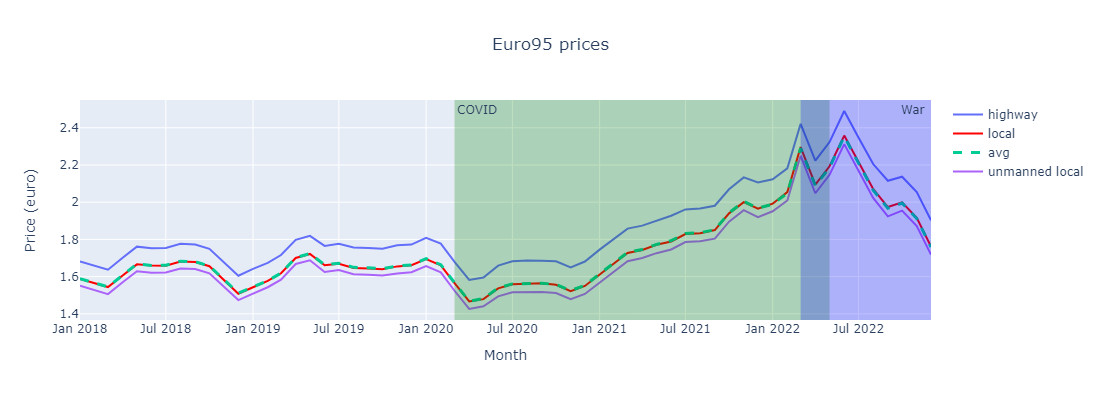

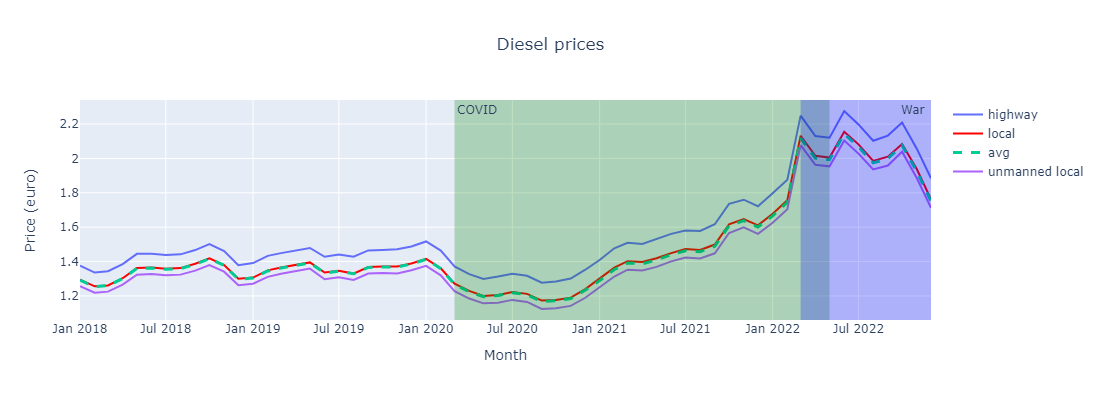

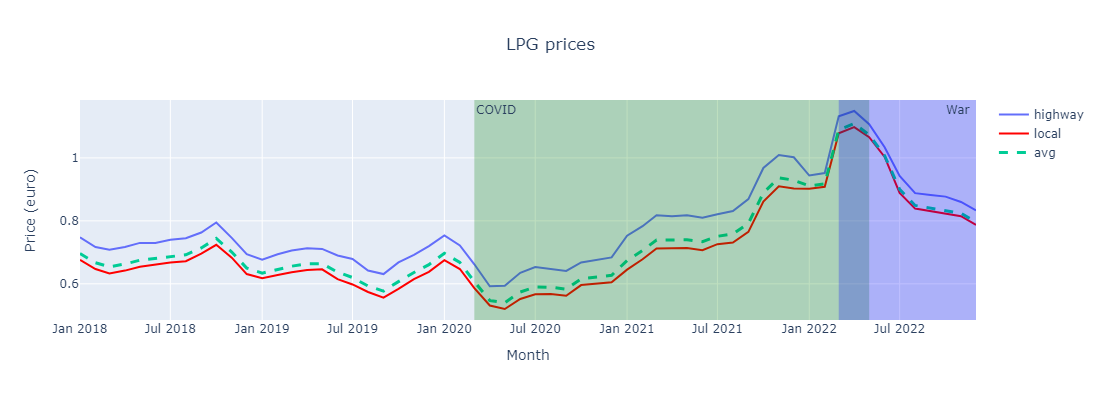

In [27]:
# Plot Euro95
fig = go.Figure()
fig.add_trace(go.Scatter(x=highway.index, y=highway['highway Euro95'],
                    mode='lines', name='highway'))
fig.add_trace(go.Scatter(x=highway.index, y=local['local Euro95'],
                    line=dict(color='red', width=2), name='local'))
fig.add_trace(go.Scatter(x=highway.index, y=avg['avg Euro95'],
                    name='avg', line=dict( width=3, dash='dash')))
fig.add_trace(go.Scatter(x=highway.index, y=unmanned['unmanned local Euro95'],
                    mode='lines', name='unmanned local'))
fig.update_layout(width=1100, height=400)
fig.update_layout(title={'text': 'Euro95 prices', 'x': 0.5}, xaxis_title='Month', yaxis_title='Price (euro)')
fig.add_vrect(x0="2020-03", x1="2022-05", 
              annotation_text="COVID ", annotation_position="top left",
              fillcolor="green", opacity=0.25, line_width=0)
fig.add_vrect(x0="2022-02", x1="2022-12", 
              annotation_text="War ", annotation_position="top right",
              fillcolor="blue", opacity=0.25, line_width=0)
fig.show()

# Plot diesel
fig = go.Figure()
fig.add_trace(go.Scatter(x=highway.index, y=highway['highway Diesel'],
                    mode='lines', name='highway'))
fig.add_trace(go.Scatter(x=highway.index, y=local['local Diesel'],
                    line=dict(color='red', width=2), name='local'))
fig.add_trace(go.Scatter(x=highway.index, y=avg['avg Diesel'],
                    name='avg', line=dict( width=3, dash='dash')))
fig.add_trace(go.Scatter(x=highway.index, y=unmanned['unmanned local Diesel'],
                    mode='lines', name='unmanned local'))
fig.update_layout(width=1100, height=400)
fig.update_layout(title={'text': 'Diesel prices', 'x': 0.5}, xaxis_title='Month', yaxis_title='Price (euro)')
fig.add_vrect(x0="2020-03", x1="2022-05", 
              annotation_text="COVID ", annotation_position="top left",
              fillcolor="green", opacity=0.25, line_width=0)
fig.add_vrect(x0="2022-03", x1="2022-12", 
              annotation_text="War ", annotation_position="top right",
              fillcolor="blue", opacity=0.25, line_width=0)
fig.show()

# Plot LPG
fig = go.Figure()
fig.add_trace(go.Scatter(x=highway.index, y=highway['highway LPG'],
                    mode='lines', name='highway'))
fig.add_trace(go.Scatter(x=highway.index, y=local['local LPG'],
                    line=dict(color='red', width=2), name='local'))
fig.add_trace(go.Scatter(x=highway.index, y=avg['avg LPG'],
                    name='avg', line=dict( width=3, dash='dash')))
fig.update_layout(width=1050, height=400)
fig.update_layout(title={'text': 'LPG prices', 'x': 0.5}, xaxis_title='Month', yaxis_title='Price (euro)')
fig.add_vrect(x0="2020-03", x1="2022-05", 
              annotation_text="COVID ", annotation_position="top left",
              fillcolor="green", opacity=0.25, line_width=0)
fig.add_vrect(x0="2022-03", x1="2022-12", 
              annotation_text="War ", annotation_position="top right",
              fillcolor="blue", opacity=0.25, line_width=0)
fig.show()

In the graphs above, the development of the fuel prices for each specific type of fuel over the years can be seen. It can be seen that overall, the price of Euro95 is the highest. Also, for each type of fuel, the prices near a highway are significantly higher. The average price of Diesel and Euro95 is almost always equal to the average local fuel prices. For LPG, some difference can be seen. The average price for LPG is somewhat higher than the average local price. The local unmanned stations have the lowest price, for LPG no data on that was available because no LPG can be tanked at unmanned stations. It is notable that the trend of the three different fuels is about the same, but the peaks differ per type. Overall it can be concluded that COVID has caused a general rise in prices for every fuel for every location. After COVID, the prices for Euro95 and LPG decreased significantly while the Diesel prices fluctuated somewhat at the same level with a little decrease. 

The higher costs associated with highway gas stations have the potential to significantly influence the behavior of travelers. The impact of these costs extends beyond just the price at the pump and can result in changes in both the mode of mobility and the routes people take.
Because there is no significant difference in the trend between highway, local, local unmanned and average prices, it is determined that for the rest of the research the average prices are used.

### Conclusion subquestion 2:

In conclusion, the difference between highway and local gas prices can have a multifaceted impact on the behavior of travelers. These higher costs can lead to changes in mobility choices and route planning, encouraging individuals to seek more cost-effective and environmentally friendly transportation options. As a result, the higher costs of highway gas stations can drive changes in travel behavior and promote greater awareness of fuel efficiency.


# Subquestion 3: How did the general mobility behaviour for all modes compared to fuel based modes change in the Netherlands?

People have started to travel more again in recent years, probably because COVID has passed, in the years during COVID more people will have traveled by car because this is private transportation and kept the chance of infection lower than traveling by public transportation. Also, since COVID, bicycle usage has increased since COVID. Furthermore, rising fuel prices are expected to make people look for alternatives, so other modes of transportation will become more attractive.

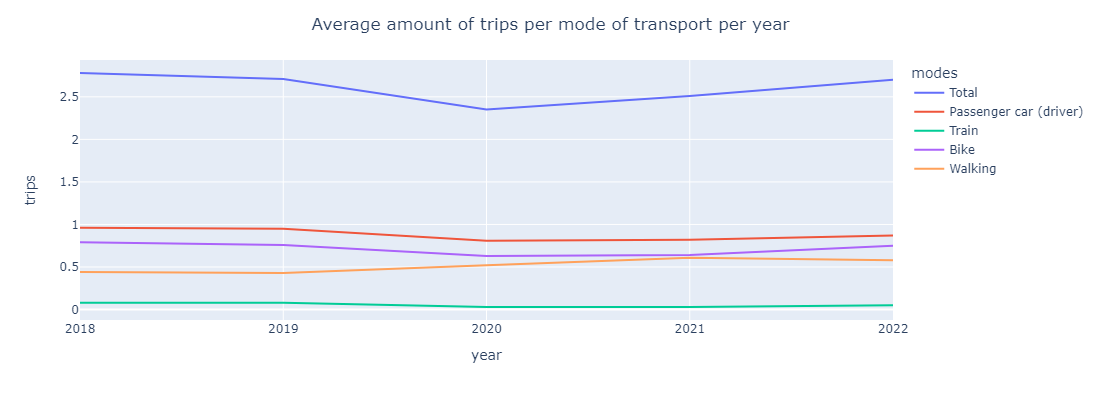

In [11]:
# Plot general mobility trend
figure = px.line(melted_mobility_trend, x='year', y='trips', color='modes', width=1100, height=400)
figure.update_layout(title={'text': f'Average amount of trips per mode of transport per year', 'x': 0.5})
figure.show()

In [12]:
# Reshape data 
mobility_trips_total_filter = mobility_trips[mobility_trips['motive'] == 'Total'] # this is double ??????
total_mobility_trips = mobility_trips_total_filter.drop(columns='motive')
total_mobility_trips_pivot = total_mobility_trips.T
total_mobility_trips_pivot = total_mobility_trips_pivot.astype(float)

# Calculate year-on-year change
yoy_changes = total_mobility_trips_pivot.pct_change() * 100
yoy_changes_filled = yoy_changes.fillna(0)
yoy_changes_filled

modes,Total,Passenger car (driver),Train,Bike,Walking
2018,0.000000,0.000000,0.000000,0.000000,0.000000
2019,-2.517986,-1.041667,0.000000,-3.797468,-2.272727
2020,-13.284133,-14.736842,-62.500000,-17.105263,20.930233
2021,6.808511,1.234568,0.000000,1.587302,17.307692
2022,7.569721,6.097561,66.666667,17.187500,-4.918033


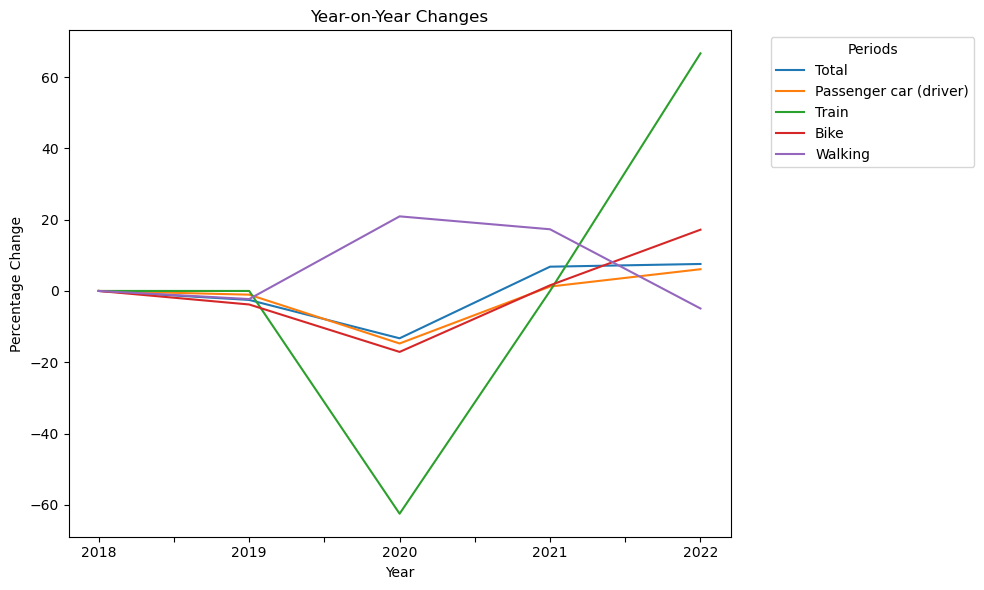

In [13]:
# Plot year to year changes per mobility
yoy_changes_filled.plot(kind='line', figsize=(10, 6))
plt.title('Year-on-Year Changes')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.legend(title='Periods', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Conclusion subquestion 3:


# Subquestion 4: How have the mobility motives developed in the considered time in the Netherlands?
In this subquestion the mobility trends found in the data from the CBS is explored. The yearly data is visualised in bar charts. First the average amount of trips per day for every vehicle combined in 2022 and after that this is also done for the years 2018 till 2022. It is expected that during covid, the travelled distances for all the travel motives have dropped, especially travelling for work. However, it is expected that after covid the travelled distance for some travel were not as high as before.

,2018,2019,2020,2021,2022
motive,,,,,
Professionally,0.07,0.11,0.07,0.08,0.08
Services/care,0.09,0.09,0.07,0.09,0.09
Attending education/courses,0.23,0.22,0.14,0.14,0.18
"Travel to/from work, (non)-daily commute",0.55,0.50,0.37,0.37,0.42
"Shopping, groceries, funshopping.",0.56,0.54,0.55,0.56,0.58
Total,2.78,2.71,2.35,2.51,2.70


,2018,2019,2020,2021,2022
motive,,,,,
Professionally,0.07,0.11,0.07,0.08,0.08
Services/care,0.09,0.09,0.07,0.09,0.09
Attending education/courses,0.23,0.22,0.14,0.14,0.18
"Travel to/from work, (non)-daily commute",0.55,0.50,0.37,0.37,0.42
"Shopping, groceries, funshopping.",0.56,0.54,0.55,0.56,0.58
Total,2.78,2.71,2.35,2.51,2.70


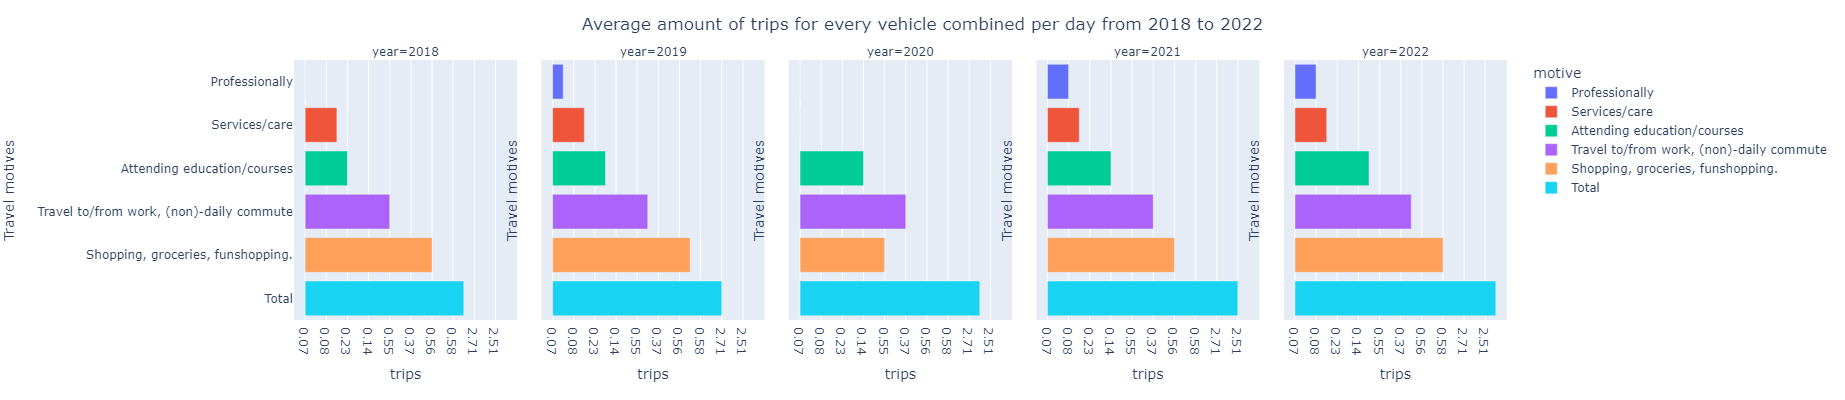

In [14]:
mobility_trips_years = mobility_trips_motive[years]
display(mobility_trips_motive)
display(mobility_trips_years)


# Melt the data to create a 'year' column
mobility_trips_years = mobility_trips_years.reset_index().melt(id_vars=['motive'], var_name='year', value_name='trips')

fig = px.bar(mobility_trips_years, x='trips', y='motive', color='motive', facet_col='year', orientation='h', hover_name='trips', width=1100, height=400)

fig.update_layout(title={
    'text': 'Average amount of trips for every vehicle combined per day from 2018 to 2022',
    'x': 0.5
})
fig.update_yaxes(title_text="Travel motives")
fig.show()

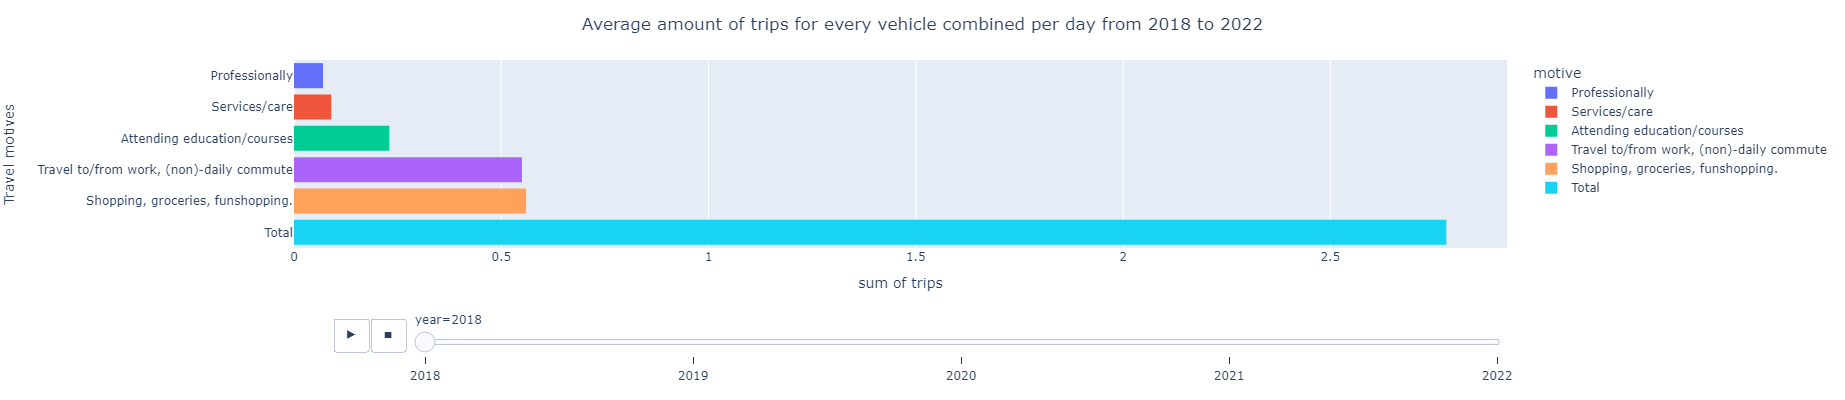

In [15]:
fig2 = px.histogram(mobility_trips_years, x='trips', y='motive', color='motive',  orientation='h',  animation_frame='year', width=1100, height=400)

fig2.update_layout(title={
    'text': 'Average amount of trips for every vehicle combined per day from 2018 to 2022',
    'x': 0.5
})

fig2.update_yaxes(title_text="Travel motives")
fig2.show()

This bar plots the same as the previous one, but for the entire given time scale. It can be seen that for all motives a substantial drop can be seen in 2020 due to the Corona virus. But if looked at before and after the Corona virus, the motive 'shopping, groceries and funshopping' is increased, but the other substantial shares of motives have descreased.

### Conclusion subquestion 4:


# Conclusion main research question

# Discussion

# References

BOVAG. (2021, April). Aantal LPG-auto's daalt onder 100.000. https://mijn.bovag.nl/actueel/nieuws/2021/oktober/aantal-lpg-auto-s-daalt-onder-100-000 <br>
Meldpunt (2020, April). Benzineprijs historisch laag, hamsteren dan maar?  https://www.maxmeldpunt.nl/vervoer/benzineprijs-historisch-laag-hamsteren-dan-maar/ <br>
Wingerden van, J. (2022, August). Benzineprijs bijna terug naar niveau van voor oekraïne oorlog. Autoweek. https://www.autoweek.nl/autonieuws/artikel/benzineprijs-terug-naar-niveau-van-voor-oekraine-oorlog/